In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime, timedelta 
import re

<b>[1.Distributions](#1)<br></b>
    1.1 Identify a Normal Distribution<br>
    1.2 Finding & Removing Outliers<br>
    
<b>[2. Replacing Missing Values](#2)<br></b>
    2.1 Random numbers from the sample<br>
    2.2 Adding a missing value indicator colmn<br>
    2.3 Performing multivariate imputation by chained equations<br>
    
<b>[3. Encoding Categorical Variables](#3)<br></b>
    3.1 One Hot Encoding<br>
    3.2 OneHotEncoding of Frequent Categories<br>
    3.3 Replacing Categories with Ordinal Numbers<br>
    3.4 Replacing Categories with Counts/Frequency of Observations<br>
    3.5 Encoding with Integers in an Ordered Manner<br>
    3.6 Mean Encoding<br>
    3.7 Encoding with the Weight of Evidence (WoE)<br>
    3.8 Grouping Rare or Infrequent Categories<br>
    3.9 Feature Hashing<br>

<b>[4. Transforming Numerical Variables](#4)<br></b>

<b>[5. Feature Discretization](#5)<br></b>
    5.1 Binning with Equal Width Intervals<br>
    5.2 Binning with Equal Frequency Intervals<br>
    5.5 Binning with k-means Clustering<br>
    5.6 Binning with Decision Trees<br>

<b>[6. Outliers ](#6)<br></b>
    6.1 Trimming Outliers<br>
    6.2 Winsorization<br>
    6.3 Capping the variable at arbitrary maximum and minimum values<br>
    
<b>[7. Deriving Features from Date and Time Variables](#7)<br></b>

<b>[8. Feature Scaling](#8)<br></b>
    8.1 Standarizing<br>
    8.2 Mean Normalization<br>
    8.3 Scaling to the Maximum and Minimum Values<br>
    8.4 Maximum Absolute Scaling<br>
    8.5 Scaling with the Median and Quantiles<br>
    
<b>[9. Applying Mathematical Computations to Features](#9)<br></b>
    9.1. Combining multiple features with statistical operations<br>
    9.4 Deriving New Features with Decision Trees<br>
    9.5 Principal Component Analysis<br>

<b>[10. Feature Generation with Transactional and Time Series Data](#10)<br></b>
    10.2 Aggregating Transactions in a Time Window (Moving Average)<br>
    10.3 Determining the Number of Local Maxima and Minima<br>
    10.4 Deriving Time Elapsed between Time-Stamped Events<br>

<b>[1. Series](#1)<br></b>
[1.1 Creating and Indexing](#1.1)<br>
[1.2 Sorting and Ranking](#1.2)<br>
[1.3 Applying a function to a series](#1.3)<br>

<b>[2. Data Frames](#2)<br></b>
[2.1 Creating a DataFrame](#2.1)<br>
[2.2 Indexing and Renaming](#2.2)<br>
[2.3 Deleting and Dropping](#2.3)<br>
[2.4 Concatenating DataFrames/Series](#2.4)<br>
[2.5 Duplicates and Unique values](#2.5)<br>
[2.6 Changing and Replacing Values](#2.6)<br>
[2.7 Text handling](#2.7)<br>

<b>[3. DataFrame Statistics](#3)</b><br>

<b>[4. Missing Data](#4)</b><br>
[4.1 Checking for null values](#4.1)<br>
[4.2 Cleaning null values](#4.2)<br>

<b>[5. GroupBy](#5)</b><br>
[5.1 Groupby with Series](#5.1)<br>
[5.2 Groupby with DataFrames](#5.2)<br>
[5.3 Groupby with a function](#5.3)<br>
[5.4 Groupby with a dictionary](#5.4)<br>

<b>[6. Reading and Writing Data](#6)</b><br>
[6.1 Reading CSV files](#6.1)<br>
[6.2 Reading and Writing Excel files](#6.2)<br>
[6.3 Reading and Writing JSON files](#6.3)<br>


<b>[7. Binning Data](#7)</b><br>
[7.1 Binning with Python](#7.1)<br>
[7.2 Binning with Pandas](#7.2)<br>
[7.3 Summerizing the Results](#7.3)<br>

<b>[8. Multi-Level Indexing](#8)</b><br>
[8.1 Indexing and SwapLevel](#8.1)<br>
[8.2 Unstacking](#8.2)<br>

<b>[9. Python Date and Time](#9)</b><br>
[9.1 Date class](#9.1)<br>
[9.2 Time class](#9.2)<br>
[9.3 Datetime class](#9.3)<br>
[9.4 Timedelta class](#9.4)<br>
[9.5 Datetime objects to/from Strings](#9.5)<br>

<b>[10. Time Series](#10)</b><br>

<b>[11. Converting Columns](#11)</b><br>

<b>[12. Case Study: Private Budgeting](#12)</b><br>

<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='1'>1. Series</a>

<b><a id='1.1'>1.1 Creating and Indexing<a>

In [3]:
# Creating a Series (using a list and its indexes)
population = Series([126.3,270.6,36.47,67.06,51.71],index=['Japan','Indonesia','Morocco','France','Korea'],name='Population in Millions')
population

Japan        126.30
Indonesia    270.60
Morocco       36.47
France        67.06
Korea         51.71
Name: Population in Millions, dtype: float64

In [4]:
# Creating a Series (using a dictionary)
population = Series({'Japan':126.3,'Indonesia':270.6,'Morocco':36.47,'France':67.06,'Korea':51.71},name='Population in Millions')
population

Japan        126.30
Indonesia    270.60
Morocco       36.47
France        67.06
Korea         51.71
Name: Population in Millions, dtype: float64

In [5]:
# Accessing the Serie's indexes and values:
population.index
population.values

array([126.3 , 270.6 ,  36.47,  67.06,  51.71])

In [6]:
# Accessing an index:
population['Japan']

126.3

In [7]:
# Accessing many indexes
population[['Japan','France']]

Japan     126.30
France     67.06
Name: Population in Millions, dtype: float64

In [8]:
# Filter values that satisfy a condition
population[(population>100) & (population<200)]

Japan    126.3
Name: Population in Millions, dtype: float64

In [9]:
population[(population>100) | (population<50)]

Japan        126.30
Indonesia    270.60
Morocco       36.47
Name: Population in Millions, dtype: float64

In [10]:
# Series re-indexing
# not to rename the index but to add more entries which are initiated with NaN
population = population.reindex(['Japan','Indonesia','Morocco','France','Korea','Ghana','Hungary'])

<b><a id='1.2'>1.2 Sorting and Ranking</a>

In [11]:
# Sorting series by index
population.sort_index()

# Sorting series by values
population.sort_values()

Morocco       36.47
Korea         51.71
France        67.06
Japan        126.30
Indonesia    270.60
Ghana           NaN
Hungary         NaN
Name: Population in Millions, dtype: float64

In [12]:
# Show the rank of each entry
population.rank()

Japan        4.0
Indonesia    5.0
Morocco      1.0
France       3.0
Korea        2.0
Ghana        NaN
Hungary      NaN
Name: Population in Millions, dtype: float64

<b><a id='1.3'>1.3 Applying a function to a series</a>

In [13]:
# We can apply a python or numpy function
population.apply(np.log)

Japan        4.838660
Indonesia    5.600642
Morocco      3.596490
France       4.205588
Korea        3.945651
Ghana             NaN
Hungary           NaN
Name: Population in Millions, dtype: float64

In [14]:
population.apply(lambda x: x if x>100 else 0)

Japan        126.3
Indonesia    270.6
Morocco        0.0
France         0.0
Korea          0.0
Ghana          0.0
Hungary        0.0
Name: Population in Millions, dtype: float64

<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='2'>2. Data Frames

<b><a id='2.1'>2.1 Creating a DataFrame

In [19]:
# Using an array
df = DataFrame(np.arange(20).reshape(5,4),index=['1st','2nd','3d','4th','5th'],columns=['col1','col2','col3','col4'])
df

,col1,col2,col3,col4
1st,0,1,2,3
2nd,4,5,6,7
3d,8,9,10,11
4th,12,13,14,15
5th,16,17,18,19


In [34]:
# Using a dictionary
popul_rank = DataFrame({'rank':['1st','2nd','3d','4th','5th'],
                'country':['China','India','USA','Indonesia','Pakistan'],
                'population':[1439323776,1380004385,331002651,273523615,220892340]})
popul_rank

,rank,country,population
0,1st,China,1439323776
1,2nd,India,1380004385
2,3d,USA,331002651
3,4th,Indonesia,273523615
4,5th,Pakistan,220892340


<b><a id='2.2'>2.2 Indexing and Renaming

In [16]:
# Retrieving column names
popul_rank.columns.values

array(['rank', 'country', 'population'], dtype=object)

In [36]:
# grabbing colums (if the column doesn't have space)
popul_rank.population
# grabbing columns (if the column has space)
popul_rank['population']

rank
1st    1439323776
2nd    1380004385
3d      331002651
4th     273523615
5th     220892340
Name: population, dtype: int64

In [18]:
#when indexing a column as above, a series is returned, to get a df we use:
popul_rank['population'].to_frame()

,population
0,1439323776
1,1380004385
2,331002651
3,273523615
4,220892340


In [19]:
# to retrieve several columns
popul_rank[['population','country']] 

,population,country
0,1439323776,China
1,1380004385,India
2,331002651,USA
3,273523615,Indonesia
4,220892340,Pakistan


In [20]:
# redefine the df using only the columns we need:
DataFrame(popul_rank,columns=['country','population'])

,country,population
0,China,1439323776
1,India,1380004385
2,USA,331002651
3,Indonesia,273523615
4,Pakistan,220892340


In [21]:
# Set the dataframe index using an existing column
# in this case, we want the column "rank" to be our index
popul_rank.set_index('rank',inplace=True)
popul_rank

,country,population
rank,,
1st,China,1439323776
2nd,India,1380004385
3d,USA,331002651
4th,Indonesia,273523615
5th,Pakistan,220892340


In [22]:
# to retrieve a row (USA)
# from row position
popul_rank.iloc[2] #or
# from index name
popul_rank.loc['3d']

country             USA
population    331002651
Name: 3d, dtype: object

In [23]:
# to retrieve several rows or slices of rows
# a list
popul_rank.iloc[[2,3]] #or
# a slice
popul_rank.iloc[2:4]

,country,population
rank,,
3d,USA,331002651
4th,Indonesia,273523615


In [24]:
# to retrieve a single value (population of USA)
# with its row and column positions 
popul_rank.iloc[2,1]  #or
# with its index and column names
popul_rank.loc['3d','population']

331002651

In [25]:
# Reindexing a dataframe (changing the order of indexes and columns)
popul_rank.reindex(index=['3d','4th','1st','3d','5th'],columns=['population','country'])

,population,country
rank,,
3d,331002651,USA
4th,273523615,Indonesia
1st,1439323776,China
3d,331002651,USA
5th,220892340,Pakistan


In [31]:
# Renaming a DataFrame (change column names to French)
# we can rename the indexes as well
popul_rank.rename(columns={'country':'pays','population':'population'})

,pays,population
rank,,
1st,China,1439323776
2nd,India,1380004385
3d,USA,331002651
4th,Indonesia,273523615
5th,Pakistan,220892340


In [34]:
# rename with dictionary comprehension and regular expressions: the regex is a mess but u get the point
popul_rank.rename(columns={element: re.sub(r'[a-z]*.','q', element) for element in popul_rank.columns.tolist()})

,q,q
rank,,
1st,China,1439323776
2nd,India,1380004385
3d,USA,331002651
4th,Indonesia,273523615
5th,Pakistan,220892340


In [308]:
# Inserting a new column in a certain location
# we can use popul_rank["new_column"]=[], but that will be added at the end of the df
popul_rank.insert(loc=2,
                  column='land_area (km2)',
                  value=[9388211,2973190,9147420,1811570,770880])
popul_rank

,country,population,land_area (km2)
rank,,,
1st,China,1439323776,9388211
2nd,India,1380004385,2973190
3d,USA,331002651,9147420
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


In [309]:
# switching index and column positions:
popul_rank.T

rank,1st,2nd,3d,4th,5th
country,China,India,USA,Indonesia,Pakistan
population,1439323776,1380004385,331002651,273523615,220892340
land_area (km2),9388211,2973190,9147420,1811570,770880


<b><a id='2.3'>2.3 Deleting and Dropping

In [310]:
# Adding a column to be deleted
popul_rank['colum to delete'] = None
print(popul_rank)
# deleting the column
del popul_rank['colum to delete']

        country  population  land_area (km2) colum to delete
rank                                                        
1st       China  1439323776          9388211            None
2nd       India  1380004385          2973190            None
3d          USA   331002651          9147420            None
4th   Indonesia   273523615          1811570            None
5th    Pakistan   220892340           770880            None


In [311]:
# dropping a column (not permanent)
popul_rank.drop('population',axis=1)

# dropping a row
popul_rank.drop('3d')

,country,population,land_area (km2)
rank,,,
1st,China,1439323776,9388211
2nd,India,1380004385,2973190
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


<b><a id='2.4'>2.4 Concatenating DataFrames/Series

In [312]:
df1 = DataFrame(np.arange(1,5))
df2 = DataFrame(np.arange(5,9))
pd.concat([df1,df2],axis=1)

,0,0
0,1,5
1,2,6
2,3,7
3,4,8


<b><a id='2.5'>2.5 Duplicates and Unique values

In [15]:
# finding duplicates
population.duplicated(keep='first') #default

Japan        False
Indonesia    False
Morocco      False
France       False
Korea        False
Ghana        False
Hungary       True
Name: Population in Millions, dtype: bool

In [16]:
# dropping duplicates
population.drop_duplicates()

Japan        126.30
Indonesia    270.60
Morocco       36.47
France        67.06
Korea         51.71
Ghana           NaN
Name: Population in Millions, dtype: float64

In [28]:
#finding unique values
population.unique()

array([126.3 , 270.6 ,  36.47,  67.06,  51.71,    nan])

<b><a id='2.6'>2.6 Changing and Replacing Values

In [315]:
# accessing the population of the 1st index (China) and changing it
popul_rank.iloc[0,1] = 'billions'
popul_rank

,country,population,land_area (km2)
rank,,,
1st,China,billions,9388211
2nd,India,1380004385,2973190
3d,USA,331002651,9147420
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


In [316]:
# we can also use .at if we want to access a single value only
# .at is much faster than .iloc
popul_rank.at['1st','population'] = 1439323776

In [317]:
# Replacing values using replace()
# can also be used with regular expressions
# different from loc and iloc, in terms that we can replace values without knowing where they occur
popul_rank.replace(to_replace="USA",value="United States")
# or in a dictionary format:
popul_rank.replace({'USA':'United States'})

,country,population,land_area (km2)
rank,,,
1st,China,1439323776,9388211
2nd,India,1380004385,2973190
3d,United States,331002651,9147420
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


In [318]:
# if value=None, we can use the parameter "method" to decide which replacement to perform
# ffill=forward fill, bfill=backward fill, None=None
popul_rank.replace(to_replace=['India','USA'],
                  value = None, method='ffill')

,country,population,land_area (km2)
rank,,,
1st,China,1439323776,9388211
2nd,China,1380004385,2973190
3d,China,331002651,9147420
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


In [319]:
popul_rank.replace(to_replace=['India','USA'],
                  value = None, method='bfill')

,country,population,land_area (km2)
rank,,,
1st,China,1439323776,9388211
2nd,Indonesia,1380004385,2973190
3d,Indonesia,331002651,9147420
4th,Indonesia,273523615,1811570
5th,Pakistan,220892340,770880


<b><a id='2.7'>2.7 Text handling

In [31]:
df = pd.DataFrame({'Data': ['1987_M_US _1','1990?_M_UK_1','1992_F_US_2','1970?_M_   IT_1','1985_F_I  T_2']})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [32]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [33]:
df = df['Data'].str.split('_',expand=True)
df.columns = ['Year', 'Sex', 'Country', 'No Children']
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [38]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [43]:
#remove blank spaces
df['Country'].str.rstrip()

0       US
1       UK
2       US
3       IT
4     I  T
Name: Country, dtype: object

In [42]:
#or:
df['Country'].str.replace(' ', '') #replace can also be used with other regex patterns

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

<hr style="height:3px;border-width:1;color:black;background-color:black">

<b><big><a id='3'>3. DataFrame Statistics

In [147]:
# Give the statistical summary of a dataframe:
popul_rank.describe()

,population,land_area (km2)
count,5.000000e+00,5.000000e+00
mean,7.289494e+08,4.818254e+06
std,6.229768e+08,4.136781e+06
min,2.208923e+08,7.708800e+05
25%,2.735236e+08,1.811570e+06
50%,3.310027e+08,2.973190e+06
75%,1.380004e+09,9.147420e+06
max,1.439324e+09,9.388211e+06


In [148]:
# Sum by rows/columns:
popul_rank.sum()

country            ChinaIndiaUSAIndonesiaPakistan
population                             3644746767
land_area (km2)                          24091271
dtype: object

In [149]:
# Cumulative sum 
popul_rank['cumulative sum'] = popul_rank['population'].cumsum()
popul_rank

,country,population,land_area (km2),cumulative sum
rank,,,,
1,China,1439323776,9388211,1439323776
2,India,1380004385,2973190,2819328161
3,USA,331002651,9147420,3150330812
4,Indonesia,273523615,1811570,3423854427
5,Pakistan,220892340,770880,3644746767


In [150]:
# Count values
popul_rank['population'].value_counts()

273523615     1
220892340     1
331002651     1
1380004385    1
1439323776    1
Name: population, dtype: int64

In [151]:
# Sorting according to the population:
popul_rank.sort_values(by='population',ascending=True)

,country,population,land_area (km2),cumulative sum
rank,,,,
5,Pakistan,220892340,770880,3644746767
4,Indonesia,273523615,1811570,3423854427
3,USA,331002651,9147420,3150330812
2,India,1380004385,2973190,2819328161
1,China,1439323776,9388211,1439323776


<hr style="height:3px;border-width:1;color:black;background-color:black">

<b><big><a id='4'>4. Missing Data

<b><a id='4.1'>4.1 Checking for null values

In [17]:
# Checking for null values
population.isnull()

Japan        False
Indonesia    False
Morocco      False
France       False
Korea        False
Ghana         True
Hungary       True
Name: Population in Millions, dtype: bool

In [18]:
# Checking for values that are not null
population.notnull()

Japan         True
Indonesia     True
Morocco       True
France        True
Korea         True
Ghana        False
Hungary      False
Name: Population in Millions, dtype: bool

In [20]:
#checking if there are null values (True or False)
#any(): returns True of there is any True value --> True even if 1 data is present
population.isnull().any()

True

In [21]:
#all(): returns True if all values are True --> to get True all data needs to be present
population.isnull().all()

False

<b><a id='4.2'>4.2 Cleaning null values

In [104]:
# Drop null values (not in place)
population.dropna(how='any') #default behavior

Japan        126.30
Indonesia    270.60
Morocco       36.47
France        67.06
Korea         51.71
Name: Population in Millions, dtype: float64

In [40]:
# Fill null values with sth 
# We can fill with sth different according to each column using a dictionary
missing_countries = {'Ghana':30.42,'Hungary':9.77}
population.fillna(missing_countries,inplace=True)
population

Japan        126.30
Indonesia    270.60
Morocco       36.47
France        67.06
Korea         51.71
Ghana         30.42
Hungary        9.77
dtype: float64

In [41]:
# whenever null values are involved the series data type is turned into float
# we can turn the series data type into int
population.astype(int)

Japan        126
Indonesia    270
Morocco       36
France        67
Korea         51
Ghana         30
Hungary        9
dtype: int32

In [ ]:
# Update null elements in df1 with values in the same location in df2
# doesn't work on series
df1.combine_first(df2)

<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='5'> 5. GroupBy

<b><a id='5.1'>5.1 Groupby with Series

In [129]:
fruits = ["apples","beries","peaches","oranges","apples","beries","peaches","oranges"]
quantities = [10,18,37,56,34,29,22,43]
s = Series(quantities,index=fruits)
s

apples     10
beries     18
peaches    37
oranges    56
apples     34
beries     29
peaches    22
oranges    43
dtype: int64

In [130]:
grouped = s.groupby(s.index)
grouped

In [131]:
for fruit,element in grouped:
    print(element,'\n')

apples    10
apples    34
dtype: int64 

beries    18
beries    29
dtype: int64 

oranges    56
oranges    43
dtype: int64 

peaches    37
peaches    22
dtype: int64 



In [132]:
# we get the same result
for fruit in set(s.index):
    print(s[fruit],'\n')

apples    10
apples    34
dtype: int64 

oranges    56
oranges    43
dtype: int64 

beries    18
beries    29
dtype: int64 

peaches    37
peaches    22
dtype: int64 



<b><a id='5.2'>5.2 Groupby with DataFrames

In [133]:
unit_weights = [100,6,150,130,100,6,150,130]
weights = [x*y for x,y in zip(unit_weights,quantities)]
color = ['red','red',]

df = DataFrame({'fruits':fruits,'quantities':quantities,'weights':weights})
df

,fruits,quantities,weights
0,apples,10,1000
1,beries,18,108
2,peaches,37,5550
3,oranges,56,7280
4,apples,34,3400
5,beries,29,174
6,peaches,22,3300
7,oranges,43,5590


In [134]:
df.groupby(['fruits']).sum()

,quantities,weights
fruits,,
apples,44,4400
beries,47,282
oranges,99,12870
peaches,59,8850


In [135]:
df.groupby(['fruits']).mean()

,quantities,weights
fruits,,
apples,22.0,2200.0
beries,23.5,141.0
oranges,49.5,6435.0
peaches,29.5,4425.0


<b><a id='5.3'>5.3 Groupby with a function

In [136]:
# Group rows by a function:
# we 1st need to change the index
df.set_index('fruits',inplace=True)
df

,quantities,weights
fruits,,
apples,10,1000
beries,18,108
peaches,37,5550
oranges,56,7280
apples,34,3400
beries,29,174
peaches,22,3300
oranges,43,5590


In [137]:
def fruit_color(fruit):
    if fruit in ['oranges','peaches']:
        return 'orange fruits'
    else:
        return 'red fruits'

In [138]:
# we can also group the columns by a function by setting: axis=1
df.groupby(by=fruit_color).sum()

,quantities,weights
orange fruits,158,21720
red fruits,91,4682


<b><a id='5.4'>5.4 Groupby with a dictionary

In [139]:
# Similarly, we can use a dictionary
color_dict = {'oranges':'orange fruits','peaches':'orange fruits','apples':'red fruits','berries':'red fruits'}
df.groupby(color_dict).sum()

,quantities,weights
orange fruits,158,21720
red fruits,44,4400


<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='6'>6. Reading and Writing Data

<b><a id='6.1'>6.1 Reading and Writing CSV files

In [ ]:
# Reading a csv file
df = pd.read_csv("file_name.csv", header = None,
                 names=[column names],
                 na_values=['','?'], #decide nan values
                 dtype={'col1':'float','col2':'int'}, #we can decide the column dtypes
                 decimal=',', #custom decimals
                 thousands=',',#or custom thousands
                 usecols=[0,2] #load specific columns only

# Different method: we just gotta indicate the delimiter
df = pd.read_table("file_name.csv",sep=",",header=None)

In [ ]:
# Writing CSV files:
df.to_csv("mydata_out.csv")

<b><a id='6.2'>6.2 Reading and Writing Excel files

In [ ]:
# Approach 1
excel_df = pd.read_excel("filename.xlsx",
                        sheet_name='sheet1')

In [443]:
# Approach 2
# Faster and lets us work with multiple sheets easily
excel_file = pd.ExcelFile("python summary.xlsx")

excel_file.sheet_names

['Sheet1', 'Documentation', 'Sheet2']


In [ ]:
# parse converts the excel sheets to a dataframe
sheet_1 = excel_file.parse('Sheet1',header=0)

In [ ]:
# Writing Excel files:
# Approach 1
df = DataFrame(np.arange(20).reshape(5,4),
                index=['1st','2nd','3d','4th','5th'],
                columns=['col1','col2','col3','col4'])

df.to_excel('out.xlsx',sheet_name='Sheet1')

In [455]:
# Approach 2: used for multiple sheets
writer = pd.ExcelWriter("mydata_out.xlsx")

df.to_excel(writer,sheet_name='Sheet1')

writer.save()
writer.close()

<b><a id='6.3'>6.3 Reading and Writing JSON files</b></a>

https://github.com/krishnatray/RDP-Reading-Data-with-Python-and-Pandas/blob/master/unit-1-reading-data-with-python-and-pandas/lesson-8-reading-json-files/files/Lecture.ipynb

In [ ]:
games = pd.read_json('games.json')

In [1]:
#Reading nested json files:
#Here we would need to use the python module for json files
import json

In [ ]:
with open('games.json') as file:
    json_dict = json.load(file)
#we then get the information we need from the dictionary keys or:

In [ ]:
df = pd.DataFrame.from_dict(json_dict['value'],
                           orient='columns') #default, keys are columns

In [2]:
#For more complex nesting:
from pandas.io.json import json_normalize

In [ ]:
df = json_normalize(json_dict['value'])

In [ ]:
#Unpack columns with nested values:
df = json_normalize(json_dict['value'],
                   record_path='nested_column')

In [ ]:
#Writing to a json file
df.to_json('out.json')

In [416]:
# Reading a dataframe from a clipboard copy
# doesn't work when the headers have 2 lines
# data source: https://www.worldometers.info/world-population/population-by-country/
# notice that commas are used to separate grops of thousands, but we can solve that
world_population = pd.read_clipboard(header=None,thousands=',')
world_population.columns = ['rank','country','population','yearly_change','net_change','density (P/km2)','land area (km2)','migrants','fert_rate','med_age','urban_pop','world_share']

In [417]:
world_population.head()

,rank,country,population,yearly_change,net_change,density (P/km2),land area (km2),migrants,fert_rate,med_age,urban_pop,world_share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399,1.7,38.0,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687,2.2,28.0,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806,1.8,38.0,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955,2.3,30.0,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379,NaN,NaN,NaN,NaN


<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='7'>7. Binning Data

<b><a id='7.1'>7.1 Binning with Python

In [5]:
# Binning in Pyhton: quite long and unpractical
def create_bins(lower_bound,width,quantity):
    bins = []
    for low in range(lower_bound,lower_bound+quantity*width,width):
        bins.append((low,low+width))
    return bins

create_bins(10,10,5)

[(10, 20), (20, 30), (30, 40), (40, 50), (50, 60)]

In [6]:
def find_bin(value,bins):
    for i in range(0,len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    return -1

In [8]:
bins = create_bins(10,10,5)
find_bin(34,bins)

2

<b><a id='7.2'>7.2 Binning with Pandas

In [24]:
#Sequence of Scalars
weights = [53,56,61,65,69,70,74,77,79,82,86,89,90,95,97]
bins1 = [50,60,70,80,90,100]
names = ['FeatherWeight','LightWeight','MiddleWeight','LightHeavyWeight','HeavyWeight']

# the function 'cut' can take a bins object in the form of: int, list of squalars or pd.IntervalIndex
weights_binned1 = pd.cut(weights,bins,labels=names)
weights_binned1

[FeatherWeight, FeatherWeight, LightWeight, LightWeight, LightWeight, ..., LightHeavyWeight, LightHeavyWeight, LightHeavyWeight, HeavyWeight, HeavyWeight]
Length: 15
Categories (5, object): [FeatherWeight < LightWeight < MiddleWeight < LightHeavyWeight < HeavyWeight]

In [26]:
pd.value_counts(weights_binned1)

LightHeavyWeight    4
LightWeight         4
MiddleWeight        3
HeavyWeight         2
FeatherWeight       2
dtype: int64

In [11]:
#Sequence of Tuples
# Assume instead of a list of scalars we have an existing list of tuples
# We turn the list of tuples into a usable data structure for the function 'cut'

tuple_bins = [(50,60),(60,70),(70,80),(80,90),(90,100)]
bins2 = pd.IntervalIndex.from_tuples(tuple_bins)

IntervalIndex([(50, 60], (60, 70], (70, 80], (80, 90], (90, 100]],
              closed='right',
              dtype='interval[int64]')

In [14]:
weights_binned2 = pd.cut(weights,bins)
weights_binned2

[(50, 60], (50, 60], (60, 70], (60, 70], (60, 70], ..., (80, 90], (80, 90], (80, 90], (90, 100], (90, 100]]
Length: 15
Categories (5, interval[int64]): [(50, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

<b><a id='7.3'>7.3 Summerizing the Results

In [27]:
# Get the labelling of the weights into the binning categories:
labels = weights_binned1.codes
labels

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4], dtype=int8)

In [28]:
# Get the catergories of bins:
# If we want to show the bins, we remove the parameter 'label=names' when creating the bins
categories = weights_binned1.categories
categories

Index(['FeatherWeight', 'LightWeight', 'MiddleWeight', 'LightHeavyWeight',
       'HeavyWeight'],
      dtype='object')

In [29]:
# Show all:
for i in range(len(weights)):
    print(weights[i],labels[i],categories[labels[i]])

53 0 FeatherWeight
56 0 FeatherWeight
61 1 LightWeight
65 1 LightWeight
69 1 LightWeight
70 1 LightWeight
74 2 MiddleWeight
77 2 MiddleWeight
79 2 MiddleWeight
82 3 LightHeavyWeight
86 3 LightHeavyWeight
89 3 LightHeavyWeight
90 3 LightHeavyWeight
95 4 HeavyWeight
97 4 HeavyWeight


<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='8'>8. Multi-Level Indexing

<b><a id='8.1'>8.1 Indexing and SwapLevel

In [30]:
# Example1
column_names = ["Country"] + list(range(2002,2013))
male_pop = pd.read_csv("male_population.csv",header=None,index_col=0,names=column_names)
female_pop = pd.read_csv("female_population.csv",header=None,index_col=0,names=column_names)

In [31]:
population = male_pop + female_pop

In [82]:
population.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country,,,,,,,,,,,
Australia,19640979.0,19872646,20091504,20339759,20605488,21015042,21431781,21874920,22342398,22620554,22683573
Austria,8139310.0,8067289,8140122,8206524,8265925,8298923,8331930,8355260,8375290,8404252,8443018
Belgium,10309725.0,10355844,10396421,10445852,10511382,10584534,10666866,10753080,10839905,10366843,11035958
Canada,NaN,31361611,31372587,31989454,32299496,32649482,32927372,33327337,33334414,33927935,34492645
Czech Republic,10269726.0,10203269,10211455,10220577,10251079,10287189,10381130,10467542,10506813,10532770,10505445


In [33]:
pop_complete = pd.concat([population.T, 
                          male_pop.T,
                          female_pop.T], 
                          keys=["total", "male", "female"])
pop_complete

Country       Australia    Austria     Belgium      Canada  Czech Republic  \
total  2002  19640979.0  8139310.0  10309725.0         NaN      10269726.0   
       2003  19872646.0  8067289.0  10355844.0  31361611.0      10203269.0   
       2004  20091504.0  8140122.0  10396421.0  31372587.0      10211455.0   
       2005  20339759.0  8206524.0  10445852.0  31989454.0      10220577.0   
       2006  20605488.0  8265925.0  10511382.0  32299496.0      10251079.0   
       2007  21015042.0  8298923.0  10584534.0  32649482.0      10287189.0   
       2008  21431781.0  8331930.0  10666866.0  32927372.0      10381130.0   
       2009  21874920.0  8355260.0  10753080.0  33327337.0      10467542.0   
       2010  22342398.0  8375290.0  10839905.0  33334414.0      10506813.0   
       2011  22620554.0  8404252.0  10366843.0  33927935.0      10532770.0   
       2012  22683573.0  8443018.0  11035958.0  34492645.0      10505445.0   
male   2002   9753133.0  3959567.0   5042288.0         NaN       5005508.0   
       2003   9873447.0  3909120.0   5066885.0  15532438.0       4966706.0   
       2004   9990513.0  3949825.0   5087176.0  15538572.0       4974740.0   
       2005  10121438.0  3986296.0   5111325.0  15842787.0       4980913.0   
       2006  10257418.0  4019354.0   5143821.0  15995582.0       5002648.0   
       2007  10444622.0  4037171.0   5181408.0  16170723.0       5026184.0   
       2008  10660917.0  4054214.0   5224309.0  16326141.0       5082934.0   
       2009  10888385.0  4068047.0   5268651.0  16524504.0       5136377.0   
       2010  11124254.0  4079093.0   5312221.0  16526676.0       5157197.0   
       2011  11260747.0  4095337.0   5370234.0  16826122.0       5168799.0   
       2012  11280804.0  4118035.0   5413801.0  17113541.0       5158210.0   
female 2002   9887846.0  4179743.0   5267437.0         NaN       5264218.0   
       2003   9999199.0  4158169.0   5288959.0  15829173.0       5236563.0   
       2004  10100991.0  4190297.0   5309245.0  15834015.0       5236715.0   
       2005  10218321.0  4220228.0   5334527.0  16146667.0       5239664.0   
       2006  10348070.0  4246571.0   5367561.0  16303914.0       5248431.0   
       2007  10570420.0  4261752.0   5403126.0  16478759.0       5261005.0   
       2008  10770864.0  4277716.0   5442557.0  16601231.0       5298196.0   
       2009  10986535.0  4287213.0   5484429.0  16802833.0       5331165.0   
       2010  11218144.0  4296197.0   5527684.0  16807738.0       5349616.0   
       2011  11359807.0  4308915.0   4996609.0  17101813.0       5363971.0   
       2012  11402769.0  4324983.0   5622157.0  17379104.0       5347235.0   

Country        Denmark    Finland      France     Germany      Greece  ...  \
total  2002  5368354.0  5194901.0  59337731.0  82440309.0  10988000.0  ...   
       2003  5383507.0  5206295.0  59630121.0  82536680.0  11006377.0  ...   
       2004  5397640.0  5219732.0  59900680.0  82531671.0  11040650.0  ...   
       2005  5411405.0  5236611.0  62518571.0  82500849.0  11082751.0  ...   
       2006  5427459.0  5255580.0  62998773.0  82437995.0  11125179.0  ...   
       2007  5447084.0  5276955.0  63392140.0  82314906.0  11171740.0  ...   
       2008  5475791.0  5300484.0  63753140.0  82217837.0  11213785.0  ...   
       2009  5511451.0  5326314.0  64366962.0  82002356.0  11260402.0  ...   
       2010  5534738.0  5351427.0  64716310.0  81802257.0  11305118.0  ...   
       2011  5560628.0  5375276.0  65129746.0  81751602.0  11309885.0  ...   
       2012  5580516.0  5401267.0  65394283.0  81843743.0  11290067.0  ...   
male   2002  2654146.0  2537597.0  28827658.0  40274676.0   5440113.0  ...   
       2003  2662423.0  2544916.0  28974588.0  40344879.0   5448582.0  ...   
       2004  2670135.0  2552893.0  29111526.0  40356014.0   5464401.0  ...   
       2005  2677292.0  2562077.0  30371081.0  40353627.0   5486632.0  ...   
       2006  2685846.0  2572350.0  30608686.0  40339961.0   5508165.0  ...   
       2007  2696662.

In [34]:
df = pop_complete.swaplevel()
df

,Country,Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,Greece,...,Norway,Poland,Portugal,Slovak Republic,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
2002,total,19640979.0,8139310.0,10309725.0,NaN,10269726.0,5368354.0,5194901.0,59337731.0,82440309.0,10988000.0,...,4524066.0,38632453.0,10335559.0,5378951.0,40409330.0,8909128.0,7261210.0,NaN,58706905.0,277244916.0
2003,total,19872646.0,8067289.0,10355844.0,31361611.0,10203269.0,5383507.0,5206295.0,59630121.0,82536680.0,11006377.0,...,4552252.0,38218531.0,10407465.0,5379161.0,41550584.0,8940788.0,7313853.0,70171979.0,59262057.0,288774226.0
2004,total,20091504.0,8140122.0,10396421.0,31372587.0,10211455.0,5397640.0,5219732.0,59900680.0,82531671.0,11040650.0,...,4577457.0,38190608.0,10474685.0,5380053.0,42345342.0,8975670.0,7364148.0,70689500.0,59699828.0,290810719.0
2005,total,20339759.0,8206524.0,10445852.0,31989454.0,10220577.0,5411405.0,5236611.0,62518571.0,82500849.0,11082751.0,...,4606363.0,38173835.0,10529255.0,5384822.0,43038035.0,9011392.0,7415102.0,71607500.0,60059858.0,294442683.0
2006,total,20605488.0,8265925.0,10511382.0,32299496.0,10251079.0,5427459.0,5255580.0,62998773.0,82437995.0,11125179.0,...,4640219.0,38157055.0,10569592.0,5389180.0,43758250.0,9047752.0,7459128.0,72519974.0,60412870.0,297308143.0
2007,total,21015042.0,8298923.0,10584534.0,32649482.0,10287189.0,5447084.0,5276955.0,63392140.0,82314906.0,11171740.0,...,4681134.0,38125479.0,10599095.0,5393637.0,44474631.0,9113257.0,7508739.0,72519974.0,60781346.0,300184434.0
2008,total,21431781.0,8331930.0,10666866.0,32927372.0,10381130.0,5475791.0,5300484.0,63753140.0,82217837.0,11213785.0,...,4737171.0,38115641.0,10617575.0,5400998.0,45283259.0,9182927.0,7593494.0,70586256.0,61179260.0,304846731.0
2009,total,21874920.0,8355260.0,10753080.0,33327337.0,10467542.0,5511451.0,5326314.0,64366962.0,82002356.0,11260402.0,...,4799252.0,38135876.0,10627250.0,5412254.0,45828172.0,9256347.0,7701856.0,71517100.0,61595094.0,305127551.0
2010,total,22342398.0,8375290.0,10839905.0,33334414.0,10506813.0,5534738.0,5351427.0,64716310.0,81802257.0,11305118.0,...,4858199.0,38167329.0,10637713.0,5424925.0,45989016.0,9340682.0,7785806.0,72561312.0,62026962.0,307756577.0
2011,total,22620554.0,8404252.0,10366843.0,33927935.0,10532770.0,5560628.0,5375276.0,65129746.0,81751602.0,11309885.0,...,4920305.0,38200037.0,10636979.0,5435273.0,46152926.0,9415570.0,7870134.0,73722988.0,62498612.0,309989078.0


In [45]:
df.sort_index(inplace=True)
df

Country       Australia    Austria     Belgium      Canada  Czech Republic  \
2002 female   9887846.0  4179743.0   5267437.0         NaN       5264218.0   
     male     9753133.0  3959567.0   5042288.0         NaN       5005508.0   
     total   19640979.0  8139310.0  10309725.0         NaN      10269726.0   
2003 female   9999199.0  4158169.0   5288959.0  15829173.0       5236563.0   
     male     9873447.0  3909120.0   5066885.0  15532438.0       4966706.0   
     total   19872646.0  8067289.0  10355844.0  31361611.0      10203269.0   
2004 female  10100991.0  4190297.0   5309245.0  15834015.0       5236715.0   
     male     9990513.0  3949825.0   5087176.0  15538572.0       4974740.0   
     total   20091504.0  8140122.0  10396421.0  31372587.0      10211455.0   
2005 female  10218321.0  4220228.0   5334527.0  16146667.0       5239664.0   
     male    10121438.0  3986296.0   5111325.0  15842787.0       4980913.0   
     total   20339759.0  8206524.0  10445852.0  31989454.0      10220577.0   
2006 female  10348070.0  4246571.0   5367561.0  16303914.0       5248431.0   
     male    10257418.0  4019354.0   5143821.0  15995582.0       5002648.0   
     total   20605488.0  8265925.0  10511382.0  32299496.0      10251079.0   
2007 female  10570420.0  4261752.0   5403126.0  16478759.0       5261005.0   
     male    10444622.0  4037171.0   5181408.0  16170723.0       5026184.0   
     total   21015042.0  8298923.0  10584534.0  32649482.0      10287189.0   
2008 female  10770864.0  4277716.0   5442557.0  16601231.0       5298196.0   
     male    10660917.0  4054214.0   5224309.0  16326141.0       5082934.0   
     total   21431781.0  8331930.0  10666866.0  32927372.0      10381130.0   
2009 female  10986535.0  4287213.0   5484429.0  16802833.0       5331165.0   
     male    10888385.0  4068047.0   5268651.0  16524504.0       5136377.0   
     total   21874920.0  8355260.0  10753080.0  33327337.0      10467542.0   
2010 female  11218144.0  4296197.0   5527684.0  16807738.0       5349616.0   
     male    11124254.0  4079093.0   5312221.0  16526676.0       5157197.0   
     total   22342398.0  8375290.0  10839905.0  33334414.0      10506813.0   
2011 female  11359807.0  4308915.0   4996609.0  17101813.0       5363971.0   
     male    11260747.0  4095337.0   5370234.0  16826122.0       5168799.0   
     total   22620554.0  8404252.0  10366843.0  33927935.0      10532770.0   
2012 female  11402769.0  4324983.0   5622157.0  17379104.0       5347235.0   
     male    11280804.0  4118035.0   5413801.0  17113541.0       5158210.0   
     total   22683573.0  8443018.0  11035958.0  34492645.0      10505445.0   

Country        Denmark    Finland      France     Germany      Greece  ...  \
2002 female  2714208.0  2657304.0  30510073.0  42165633.0   5547887.0  ...   
     male    2654146.0  2537597.0  28827658.0  40274676.0   5440113.0  ...   
     total   5368354.0  5194901.0  59337731.0  82440309.0  10988000.0  ...   
2003 female  2721084.0  2661379.0  30655533.0  42191801.0   5557795.0  ...   
     male    2662423.0  2544916.0  28974588.0  40344879.0   5448582.0  ...   
     total   5383507.0  5206295.0  59630121.0  82536680.0  11006377.0  ...   
2004 female  2727505.0  2666839.0  30789154.0  42175657.0   5576249.0  ...   
     male    2670135.0  2552893.0  29111526.0  40356014.0   5464401.0  ...   
     total   5397640.0  5219732.0  59900680.0  82531671.0  11040650.0  ...   
2005 female  2734113.0  2674534.0  32147490.0  42147222.0   5596119.0  ...   
     male    2677292.0  2562077.0  30371081.0  40353627.0   5486632.0  ...   
     total   5411405.0  5236611.0  62518571.0  82500849.0  11082751.0  ...   
2006 female  2741613.0  2683230.0  32390087.0  42098034.0   5617014.0  ...   
     male    2685846.0  2572350.0  30608686.0  40339961.0   5508165.0  ...   
     total   5427459.0  5255580.0  62998773.0  82437995.0  11125179.0  ...   
2007 female  2750422.0  2693213.0  32587979.0  42013740.0   5639693.0  ...   
     male    2696662.

In [73]:
df.index

MultiIndex(levels=[[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012], ['female', 'male', 'total']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [113]:
df.loc[2002].loc['female']

Country
Australia            9887846.0
Austria              4179743.0
Belgium              5267437.0
Canada                     NaN
Czech Republic       5264218.0
Denmark              2714208.0
Finland              2657304.0
France              30510073.0
Germany             42165633.0
Greece               5547887.0
Hungary              5337873.0
Iceland               143125.0
Ireland              1954407.0
Italy               29406500.0
Japan               65047000.0
Korea               23655780.0
Luxembourg            225230.0
Mexico              51143166.0
Netherlands          8133318.0
New Zealand          2005120.0
Norway               2282132.0
Poland              19871665.0
Portugal             5343969.0
Slovak Republic      2767030.0
Spain               20629952.0
Sweden               4500683.0
Switzerland          3712121.0
Turkey                     NaN
United Kingdom      29753779.0
United States      141943484.0
Name: female, dtype: float64

In [116]:
# Example2
cities = ["Vienna", "Vienna", "Vienna",
          "Hamburg", "Hamburg", "Hamburg",
          "Berlin", "Berlin", "Berlin",
          "Zürich", "Zürich", "Zürich"]
index = [cities, ["country", "area", "population",
                  "country", "area", "population",
                  "country", "area", "population",
                  "country", "area", "population"]]

In [117]:
data = ["Austria", 414.60,    1805681,
        "Germany", 755.00,    1760433,
        "Germany", 891.85,    3562166,
        "Switzerland", 87.88, 378884]

city_series = pd.Series(data, index=index)
print(city_series)

Vienna   country           Austria
         area                414.6
         population        1805681
Hamburg  country           Germany
         area                  755
         population        1760433
Berlin   country           Germany
         area               891.85
         population        3562166
Zürich   country       Switzerland
         area                87.88
         population         378884
dtype: object


In [118]:
#???????????????????????????????????
# Why is it that here I don't have to use df.loc[].loc[]???
city_series['Vienna']['country']

'Austria'

<b><a id='8.2'>8.2 Unstacking

In [119]:
# Turn the 2 level index series into a dataframe:
city_series.unstack()

,area,country,population
Berlin,891.85,Germany,3562166
Hamburg,755,Germany,1760433
Vienna,414.6,Austria,1805681
Zürich,87.88,Switzerland,378884


<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big>9) Mapping

In [ ]:
# Mapping is a good way to add columns to dataframes

In [124]:
peaks = DataFrame({'Mountain':['Fuji','Toubkal','Everest','Kilimanjaro'],
               'Altitude':[3776,4167,8848,5898]})
peaks

,Mountain,Altitude
0,Fuji,3776
1,Toubkal,4167
2,Everest,8848
3,Kilimanjaro,5898


In [125]:
country_map = {'Fuji':'Japan','Toubkal':'Morocco','Everest':'Nepal','Kilimanjaro':'Tanzania'}

In [126]:
peaks['Country'] = peaks['Mountain'].map(country_map)
peaks

,Mountain,Altitude,Country
0,Fuji,3776,Japan
1,Toubkal,4167,Morocco
2,Everest,8848,Nepal
3,Kilimanjaro,5898,Tanzania


<hr style="height:3px;border-width:1;color:black;background-color:black">
<big><b><a id='9'>9. Python Date and Time</a></big></b>


Python modules for date and time: time, calendar, datetime

'datetime' module classes:
<li>date: date objects where the year can range between 1 and 9999
<li>datetime: a date and a time object
<li>time: time object
<li>timedelta: holds the difference between 2 date or 2 time objects
<li>tzinfo: used to implement timezone support for time and datetime objects

<b><a id='9.1'>9.1 Date class

In [12]:
from datetime import date
x = date(1993,6,10)
print(x)

# coversion to the Gregorian calendar
x2 = x.toordinal()
print(x2)

# conversion back from the Gregorian calendar
x3 = date.fromordinal(x2)
print(x3)

1993-06-10
727724
1993-06-10


In [13]:
# find the weekday of a certain date
# Monday = 0, ....
x.weekday()

3

In [15]:
# find the current date and print each component
today = date.today()
print(today.day)
print(today.month)
print(today.year)

11
3
2021


In [19]:
# display the date as a C-style string
x.ctime()

'Thu Jun 10 00:00:00 1993'

<b><a id='9.2'>9.2 Time class

In [16]:
from datetime import time

t = time(13,10,12)
print(t)

13:10:12


In [17]:
t.hour, t.minute, t.second

(13, 10, 12)

In [18]:
# replace a certain component of the time object
t.replace(hour=16,second=20)

datetime.time(16, 10, 20)

<b><a id='9.3'>9.3 Datetime class</a></b>

There are 2 kinds of datetime objects:
- naive: it doesn't contain information to compare/locate itself relative to other datetime objects.
- aware: contains information of the time zone it belongs to / daylight saving information,...

In [48]:
from datetime import datetime

dt = datetime(1993,6,10,16,20,12)
print(dt)

1993-06-10 16:20:12


In [27]:
# naive/aware
# dt is aware if dt.tzinfo is not None and dt.tzinfo.utcoffset(t) is not none
print(dt.tzinfo)

None


In [30]:
# let's create an aware datetime object
# For this purpose we need the module pytz. 
# pytz is a module, which brings the Olson tz database into Python.
import pytz
t = datetime.now(pytz.utc)

print(t)
print(t.tzinfo)
# utcoffset = timedelta showing the offset from utc, negative values to the west
print(t.tzinfo.utcoffset(t))

2021-03-11 04:28:25.387107+00:00
UTC
0:00:00


In [47]:
# to show the date in a specific timezone we define a timezone object
# we can get the list of all timezones from pytz.all_timezones
tz_object = pytz.timezone('Asia/Tokyo')
now = datetime.now(tz_object)
print(now)

2021-03-11 13:36:54.778935+09:00


In [46]:
#Turn a time column into a timestamp
df = pd.DataFrame({'Timestamp':['2017-02-04','2017-03-04','2017-04-04','2017-05-04']})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp
0,2017-02-04
1,2017-03-04
2,2017-04-04
3,2017-05-04


In [47]:
df.dtypes

Timestamp    datetime64[ns]
dtype: object

<b><a id='9.4'>9.4 Timedelta class

In [55]:
# the result of the substraction of 2 datetime objects is a timedelta object
delta = datetime.now()-datetime(1993,6,10)
print(delta)
print(type(delta))

10136 days, 14:25:34.010163
<class 'datetime.timedelta'>


In [60]:
from datetime import timedelta
# we can substract a timedelta objects to a datetime object to create a new datetime object
d1 = datetime(2006,10,12,16)
d2 = d1 + timedelta(days=10,hours=2,minutes=25)

print(d1)
print(d2)

2006-10-12 16:00:00
2006-10-22 18:25:00


<b><a id='9.5'>9.5 Datetime objects to/from Strings

In [61]:
# convert datetime objects to strings
str(d1)

'2006-10-12 16:00:00'

In [65]:
# convert datetime objects to strings in a specific format
# https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

print(d1.strftime('%Y-%m-%d'))
print('weekday: ',d1.strftime('%a'))
print('weekday as a full name: ',d1.strftime('%A'))

2006-10-12
weekday:  Thu
weekday as a full name:  Thursday


In [70]:
# Convert strings to datetime objects
s = '10 Jun 93'
d = datetime.strptime(s,'%d %b %y')

print(s)
print(d)

10 Jun 93
1993-06-10 00:00:00


In [71]:
s = '10/06/1993 4:25:13 AM'
d = datetime.strptime(s,'%d/%m/%Y %I:%M:%S %p')

print(s)
print(d)

10/06/1993 4:25:13 AM
1993-06-10 04:25:13


<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='10'>10. Time Series

In [77]:
start = datetime(2021,3,11)
dates = [start - timedelta(days=x) for x in range(10)]
values = [25, 50, 15, 67, 70, 9, 28, 30, 32, 12]

ts1 = pd.Series(values,index=dates)
ts1

2021-03-11    25
2021-03-10    50
2021-03-09    15
2021-03-08    67
2021-03-07    70
2021-03-06     9
2021-03-05    28
2021-03-04    30
2021-03-03    32
2021-03-02    12
dtype: int64

In [78]:
# we can add 2 time series together
start = datetime(2021,3,9)
dates = [start - timedelta(days=x) for x in range(10)]
values = [25, 50, 15, 67, 70, 9, 28, 30, 32, 12]

ts2 = pd.Series(values,index=dates)
ts2

2021-03-09    25
2021-03-08    50
2021-03-07    15
2021-03-06    67
2021-03-05    70
2021-03-04     9
2021-03-03    28
2021-03-02    30
2021-03-01    32
2021-02-28    12
dtype: int64

In [79]:
ts1-ts2

2021-02-28     NaN
2021-03-01     NaN
2021-03-02   -18.0
2021-03-03     4.0
2021-03-04    21.0
2021-03-05   -42.0
2021-03-06   -58.0
2021-03-07    55.0
2021-03-08    17.0
2021-03-09   -10.0
2021-03-10     NaN
2021-03-11     NaN
dtype: float64

In [86]:
# We can generate a DateTimeIndex object through the Pandas date_range method, instead of manually
# EX: with a business day frequency
index = pd.date_range('03-11-2021','03-21-2021',freq='B')
print(index)
type(index)

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19'],
              dtype='datetime64[ns]', freq='B')


pandas.core.indexes.datetimes.DatetimeIndex

<hr style="height:3px;border-width:1;color:black;background-color:black">
<b><big><a id='11'>11. Converting columns

we have a csv file with the following data

Position    "Language"  Percentage
<br>1       Java    16.748%
<br>2       C   14.396% 
<br>3       C++ 8.282%
<br>4       Python  7.683%
<br>5       "Visual Basic .NET" 6.490%
<br>6       C#  3.952%
<br>7       JavaScript  2.655%
<br>8       PHP 2.376%
<br>9       SQL 1.844%

In [6]:
# The percentage column contains strings with a percentage sign. We can get rid of this by defining a converter function
def strip_percentage_sign(x):
    return float(x.strip('%'))

data = pd.read_csv("prog_languages.csv",
                   index_col=1,
                   converters={'Percentage':strip_percentage_sign})
data

,Position,Percentage
Language,,
Java,1,16.75
C,2,14.40
C++,3,8.28
Python,4,7.68
Visual Basic,5,6.49
C#,6,3.95
JavaScript,7,2.66
PHP,8,2.38
SQL,9,1.84


<hr style="height:3px;border-width:1;color:black;background-color:black">
<big><b><a id='12'>12. Case Study: Private Budgeting

In [186]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [187]:
data = pd.read_csv('Monefy.Data.3-11-21.csv',thousands=',')
data.head()

,date,category,amount
0,26/01/2020,Gifts,-321.0
1,26/01/2020,Transport,-168.0
2,26/01/2020,Toiletry,-110.0
3,26/01/2020,Toiletry,-935.0
4,26/01/2020,Food,-291.0


In [188]:
data['in'],data['out'] = data['amount'],data['amount']
data['in'][data['in']<0] = 0
data['out'][data['out']>0] = 0
data['out'] = -data['out']

C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
data.insert(loc=0,column='day',value=[date[0:2] for date in data['date']])
data.insert(loc=1,column='month',value=[date[3:5] for date in data['date']])
data.insert(loc=2,column='year',value=[date[6:10] for date in data['date']])

In [190]:
data.head()

,day,month,year,date,category,amount,in,out
0,26,01,2020,26/01/2020,Gifts,-321.0,0.0,321.0
1,26,01,2020,26/01/2020,Transport,-168.0,0.0,168.0
2,26,01,2020,26/01/2020,Toiletry,-110.0,0.0,110.0
3,26,01,2020,26/01/2020,Toiletry,-935.0,0.0,935.0
4,26,01,2020,26/01/2020,Food,-291.0,0.0,291.0


In [191]:
income = data['in'].sum()
spendings = data['out'].sum()
savings = income-spendings
print(income, spendings, savings)

3812982.0 2810389.7 1002592.2999999998


In [192]:
categories = data.groupby('category').sum()['out'] 
categories.drop(labels=['Other','Salary'],inplace=True)
categories.head()

category
Bills            1126467.0
Clothes            88725.0
Eating out        195872.0
Entertainment      35430.0
Food              365262.0
Name: out, dtype: float64

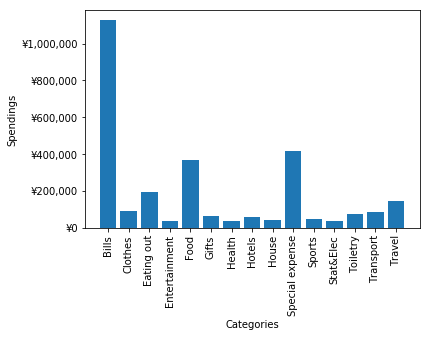

In [203]:
def thousands(x,pos):
    return (f'¥{int(x):,}')

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots()

ax.bar(x=categories.index,height=categories)
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Categories')
ax.set_ylabel('Spendings')

plt.xticks(rotation=90)
plt.show()

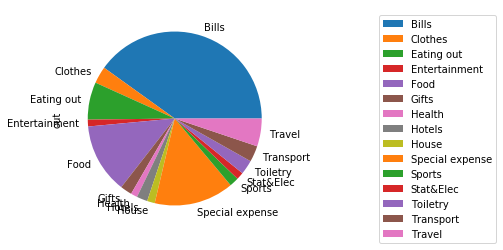

In [147]:
ax = categories.plot.pie(y='out')
ax.legend(loc='best',bbox_to_anchor=(2,1))